# State Machines

[A Machine State of Mind](http://vaidehijoshi.github.io/blog/2015/03/17/a-machine-state-of-mind-part-1-understanding-state-machines/)

[DOT Graphviz language](https://graphs.grevian.org/example)

In [1]:
import graphviz

In [153]:
!cat topics-3.dot

digraph {
  proposed -> scheduled;
  scheduled -> completed;
}


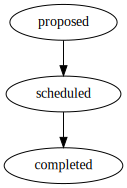

In [7]:
graphviz.Source.from_file('topics-3.dot')

In [13]:
from transitions import Machine
from dataclasses import dataclass

In [137]:
@dataclass
class Topic:
    
    name: str
        
    def __post_init__(self):
        self.presenter = None
        self.machine = Machine(
            model=self, 
            states=['proposed', 'scheduled', 'completed', ], 
        )
        

Warning!  Do not create a Machine pointing to a class... it almost works, but then does not (for instance, on callbacks)

In [138]:
t1 = Topic('Block programming')

In [139]:
t1

Topic(name='Block programming')

Now we have a built-in state

In [118]:
t1.state

'initial'

And built-in methods to change the state

In [120]:
t1.to_proposed()

True

In [121]:
t1.state

'proposed'

In [122]:
t1.to_scheduled()
t1.state

'scheduled'

Oops, let's set a real initial state

In [143]:
@dataclass
class Topic:
    
    name: str
    
    def __post_init__(self):
        self.presenter = None
        self.machine = Machine(
            model=self, 
            states=['proposed', 'scheduled', 'completed', ], 
            initial = 'proposed',
        )
t2 = Topic('time zones')

In [142]:
t2.state

'completed'

But these aren't proper transitions

In [125]:
t2.to_completed()
t2.state

'completed'

## Transitions



In [144]:
@dataclass
class Topic:
    
    name: str
        
    def __post_init__(self):
        self.presenter = None
        self.machine = Machine(
            model=self, 
            states=['proposed', 'scheduled', 'completed', ], 
            initial='proposed',
            transitions=[
                {'trigger': 'schedule', 'source': 'proposed', 'dest': 'scheduled'},
                {'trigger': 'complete', 'source': 'scheduled', 'dest': 'completed'},        
            ])  
t3 = Topic('Immutability')

In [145]:
t3.state

'proposed'

In [146]:
t3.complete()

MachineError: "Can't trigger event complete from state proposed!"

In [147]:
t3.schedule()

True

In [148]:
t3.state

'scheduled'

In [149]:
t3.complete()

True

In [150]:
t3.state

'completed'

Don't use the `to_` methods.  They're cheating.  You can even disable them.

## Callbacks

In [151]:
@dataclass
class Topic:
    
    name: str
        
    def __post_init__(self):
        self.presenter = None
        self.machine = Machine(
            model=self, 
            states=['proposed', 'scheduled', 'completed', ], 
            initial='proposed',
            transitions=[
                {'trigger': 'schedule', 'source': 'proposed', 'dest': 'scheduled'},
                {'trigger': 'complete', 'source': 'scheduled', 'dest': 'completed'},        
            ])  
        
    def on_enter_scheduled(self):
        print('Update the website!')
        
t4 = Topic('FOSS contribution')

In [152]:
t4.schedule()

Update the website!


True